In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [4]:
def crop_upper_part(image, percent=0.4):
    height, _ = image.shape
    point = int(percent * height)
    return image[0:point,:]

33


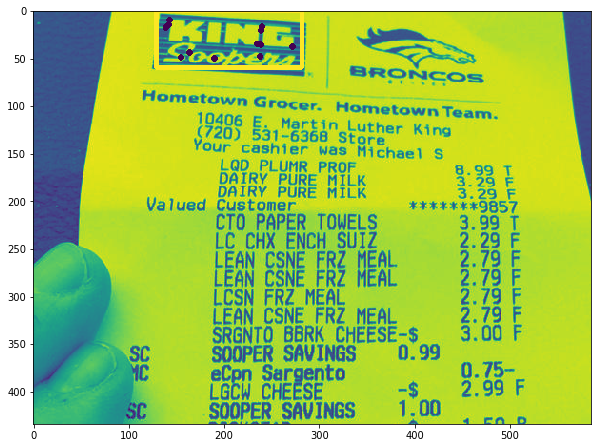

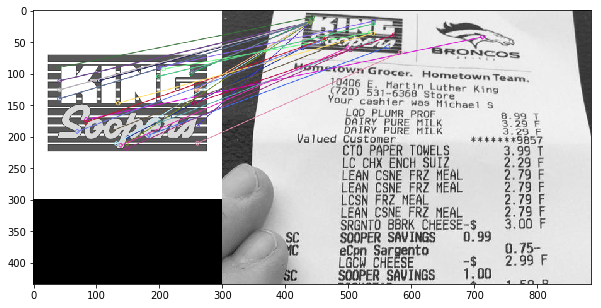

In [123]:
img1 = cv2.imread('/Users/Dkopljar/Downloads/king.png',0)          # queryImage
img2 = cv2.imread('/Users/Dkopljar/Downloads/test_class/KingSoopers/9495.jpg',0) # trainImage
# Initiate SIFT detector
img2 = crop_upper_part(img2, 0.4)
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)



# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
print(len(good))
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
for mat in good:

    # Get the matching keypoints for each of the images
    img1_idx = mat[0].queryIdx
    img2_idx = mat[0].trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = kp1[img1_idx].pt
    (x2,y2) = kp2[img2_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

mean = np.mean(list_kp2, axis=0)
std = np.std(list_kp2, axis=0)

xCords = []
yCords = []
for x,y in list_kp2:
    if(x<(mean[0]+1.5*std[0]) and x>(mean[0]-1.5*std[0])):
        if(y<(mean[1]+1.5*std[1]) and y>(mean[1]-1.5*std[1])):
            x = int(x)
            y = int(y)
            xCords.append(x)
            yCords.append(y)
            cv2.rectangle(img2,(x-1,y-1),(x+1,y+1),(0,255,0),3)
cv2.rectangle(img2,(np.min(xCords)-10,np.min(yCords)-10),(np.max(xCords)+10,np.max(yCords)+10),(255,0,0),3)

plt.imshow(img2)
#plt.imshow(img3)
plt.show()

plt.imshow(img3)
plt.show()

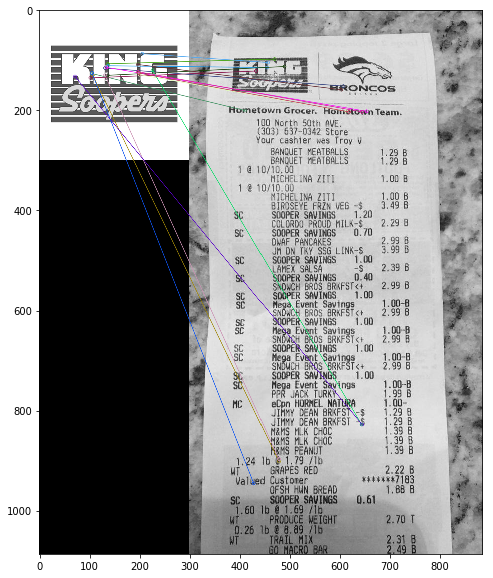

In [76]:
img1=cv2.imread('/Users/Dkopljar/Downloads/king.png',0)
img2=cv2.imread('/Users/Dkopljar/Downloads/test_class/KingSoopers/2163.jpg',0)

orb=cv2.ORB_create(nfeatures=100000)
kp1,des1=orb.detectAndCompute(img1,None)
kp2,des2=orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:17],None, flags=2)

plt.imshow(img3)
plt.show()

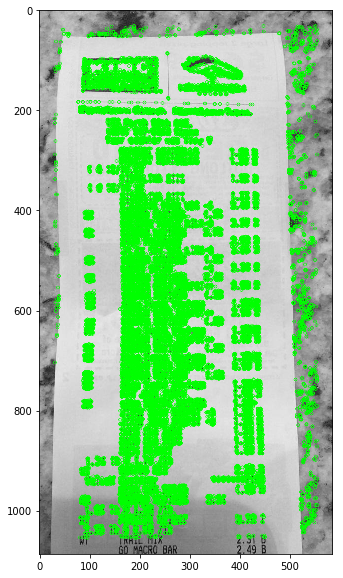

In [72]:
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = kp1[img1_idx].pt
    (x2,y2) = kp2[img2_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))
plt.imshow(img2kp)
plt.show()